<a href="https://colab.research.google.com/github/spacemaninSeoul/PythonMachinelearningGuide/blob/main/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C%5D_IV_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 분류(Classification)의 개요

지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식이다. 지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.

즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것이다.

# 2. 결정 트리

결정 트리(Decision Tree)는 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것이다.

데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

결정 트리의 구조에서(책 185p) 규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값이다. 그리고 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성된다. 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다. 하지만 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어지기 쉽다. 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다.

정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수가 있다.
* **정보 이득**은 엔트로피라는 개념을 기반으로 한다. 엔트로피는  주어진 데이터 집합의 혼잡도를 의미한다. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피 값이 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 즉 ' 1 - 엔트로피 지수 '이다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 (엔트로피 지수가 낮은) 속성을 기준으로 분할한다.
* **지니 계수**는 머신러닝에서 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다. 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

## 1) 결정 트리 모델의 특징

결정 트리의 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이라는 점이다. 또 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다.

반면에 가장 큰 단점으로는 과적합으로 정확도가 떨어진다는 점이다.

* **결정 트리 장점** : 쉽다, 직관적이다. 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음
* **결정 트리 단점** : 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요.

## 2) 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 분류를 위한 클래스인 DecisionTreeClassifier와 회귀를 위한 클래스인 DecisionTreeRegressor를 제공한다. DecisionTreeClassifier와 DecisionTreeRegressor 모두 파라미터는 다음과 같이 동일한 파라미터를 사용한다.
* min_samples_split
  * 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
  * 디폴트는 2, 작게 설정할 수록 분할되는 노드가 많아져서 과적합 가능성 증가.
  * 과적합을 제어. 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가.

* min_samples_leaf
  * 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수.
  * 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요.

* max_features
  * 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 사용.
  * int 형으로 지정하면 대상 피처 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
  * 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수), 즉 루트 전체 피처 개수 만큼 선정
  * 'auto'로 지정하면 sqrt와 동일
  * 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
  * 'None'은 전체 피처 선정

* max_depth
  * 트리의 최대 깊이를 규정
  * 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴.
  * 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요.

* max_leaf_nodes
  * 말단 노드(Leaf)의 최대 개수



## 3) 결정 트리 모델의 시각화

결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법이 Graphviz 패키지를 이용하는 것이다.

사이킷런의 **export_graphviz( )** 는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여준다.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

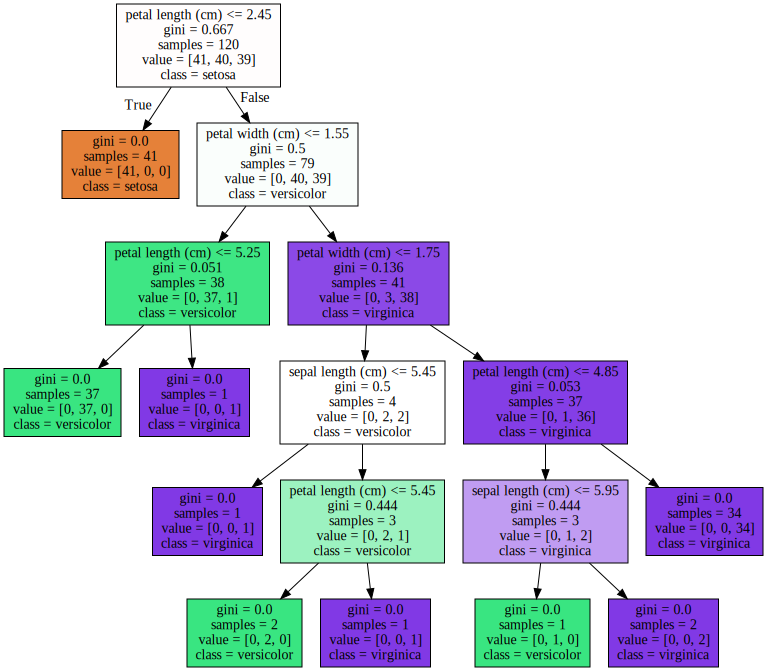

In [4]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

먼저 더 이상 자식 노드가 없는 노드는 리프 노드이다. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드이다. 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다.

자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다. 위 그림에서 노드 내 기술된 지표의 의미는 다음과 같다.
* petal length(cm) <= 2.45 와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이다. 이 조건이 없으면 리프 노드이다.
* gini는 다음의 value=[ ]로 주어진 데이터 분포에서의 지니 계수이다. (낮을 수록 데이터 균일도가 높은 것으로 해석해, 지나 계수가 낮은 속성을 기준으로 분할)
* samples는 현 규칙에 해당하는 데이터 건수이다.
* value = [ ]는 클래스 값 기반의 데이터 건수이다. 붓꽃 데이터 세트에서 만일 value = [41, 40, 39]라면 클래스 값의 순서로 Setosa 41개, Vesicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미이다.

색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미이다.

결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 간다. 이로 인해 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 된다. 결정 트리는 이러한 이유로 과적합이 상당히 높은 ML 알고리즘이다. 이 때문에 결정트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도이다.

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **feature_importances_** 속성으로 제공한다.

feature_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당된다. 값이 높을수록 해당 피처의 중요도가 높다는 의미이다.

위의 예제에서 fit( )으로 학습된 DecisionTreeClassifier 객체 변수인 df_clf에서 feature_importances_ 속성을 가져와 피처별로 중요도 값을 매핑하고 이를 막대그래프로 표현해보도록 한다.

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


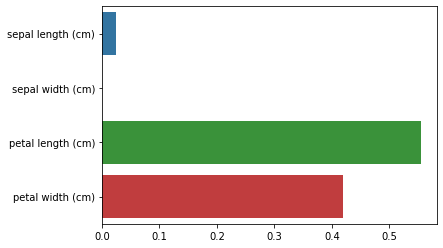

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 4) 결정 트리 과적합(Overfitting)

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보도록 한다.

사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 **make_classification( )** 함수를 제공한다.

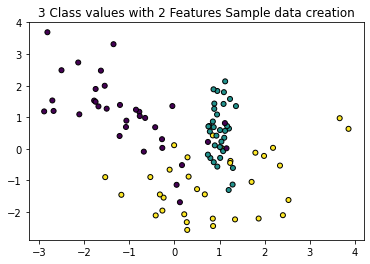

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

X_features와 y_labels 데이터 세트를 기반으로 결정 트리를 학습한다. 첫 번째 학습 시에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인하도록 한다.

이를 위해 별도의 함수인 **visualize_boundary( )**를 생성한다. 해당 함수는 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해준다.

In [7]:
import numpy as np

# Classifier 의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
  flg, ax = plt.subplots()

  # 학습 데이터 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start , xlim_end = ax.get_xlim()
  ylim_start , ylim_end = ax.get_ylim()

  # 호출 파라미터로 들어온 training 데이터로 model 학습
  model.fit(X, y)

  # meshgrid 형태인 모든 좌표값으로 예측 수행.
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # contour() 를 이용하여 class boundary 를 visualization 수행.
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
                         levels=np.arange(n_classes + 1) - 0.5,
                         cmap = 'rainbow', clim=(y.min(), y.max()), zorder=1)

결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifier를 학습하고 결정 기준 경계를 시각화하도록 한다.

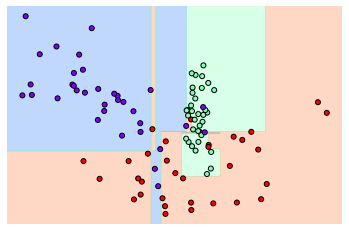

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치(Outlier) 데이터까찌 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다. 결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해졌다.

이번엔 min_samples_leaf = 6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 뒤 하이퍼 파라미터를 변경해 어떻게 결정 기준 경계까 변하는지 살펴보도록 한다.

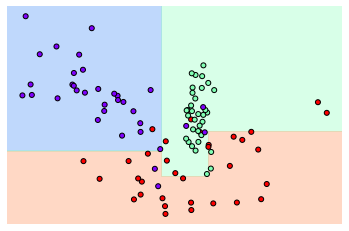

In [9]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있다.

## 5) 결정 트리 실습 - 사용자 행동 인식 데이터 세트



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음을 유추할 수 있다.

위에서 피처명을 가지고 있는 feature.txt 파일은 중복된 피처명을 가지고 있다. 따라서 중복된 피처명에 대해서 원본 피처명에 _1 또는 _2 를 추가로 부여해 변경한 뒤 이를 이용해 데이터를 DataFrame에 로드하도록 한다.

먼저 중복된 피처명이 얼마나 있는지 확인하도록 한다.

In [11]:
# 중복된 피처명이 얼마나 있는지 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']> 1].count())
feature_dup_df[feature_dup_df['column_index']> 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


총 42개의 피처명이 중복되어 있다. 이 중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df( )를 생성한다.

In [12]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns = ['dup_cnt']) # cumcount()는 같은 그룹(같은 이름의 피처)에 대해서 순차적으로 번호를 부여하는 함수
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
  if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

이제 train 디렉터리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트, test 디렉터리에 있는 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DataFrame에 로드하겠습니다. 각 데이터 파일은 공백으로 분리돼 있으므로 read_csv()의 sep 인자로 공백 문자를 입력한다. 레이블의 칼럼은 'action'으로 명명한다.

해당 데이터 세트는 이후 다른 예제에서도 자주 사용되므로 이 DataFrame을 생성하는 로직을 간단한 함수로 생성한다. 함수명은 get_human_datset()으로, 앞에서 생성한 get_new_feature_name_df()는 get_human_dataset() 내에서 적용돼 중복된 피처명을 새로운 피처명으로 할당한다.

In [13]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당한다.
  feature_name_df = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])
  
  # 중복된 피처명을 수정하는 get_new_feature_name_df() 를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
  print('feature_name :', feature_name)

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

feature_name : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc

In [14]:
# 로드한 학습용 피처 데이터 세트 간략히 살펴보기
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [15]:
# 레이블 값 확인
print(y_train['action'].value_counts())


6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [16]:
# 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


이번엔 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향을 살펴본다. 결정 트리의 경우 분류를 위해 리프 노드(클래스 결정 노드)가 될 수 있는 적합한 수준이 될 때까지 지속해서 트리의 분할을 수행하면서 깊이가 깊어진다.

다음은 GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능을 확인한다.

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring ='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


이 예제의 수행 목표는 max_depth 값의 증가에 따라 예측 성능이 어떻게 변했는지 확인하는 것이 우선이다. 5개의 cv 세트에서 max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 cv_result_ 속성을 통해 살펴보도록 한다 GridSearchCV 객체의 **cv_results_** 속성은 CV세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있다.

In [21]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 더욱 더 복잡한 모델이 된다. 깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올지 모르지만, 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하를 유발할 수 있다.

이번에는 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정하도록 한다.

In [22]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


이처럼 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 한다.

In [23]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


앞 예제의 GridSearchCV 객체인 grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습된 Estimator 객체이다. 이를 이용해 테스트 데이터 세트에 예측을 수행하도록 한다.

In [24]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


마지막으로 결정 트리에서 각 피처의 중요도를 **feature_importances_** 속성을 이용해 알아보도록 한다. 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현한다.

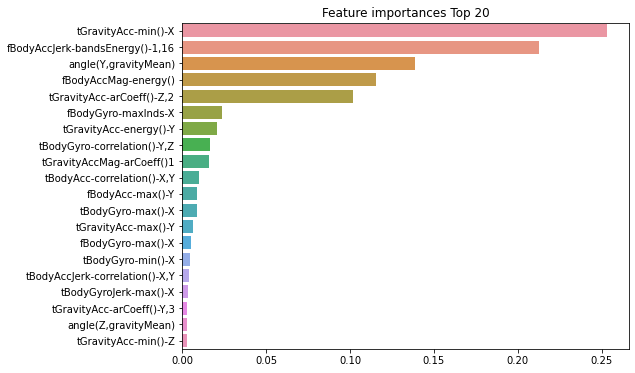

In [25]:
import seaborn as sns

ftr_importance_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importance_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()